In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report


In [77]:
df = pd.read_csv("cosmetics.csv")
data = df.describe()
data

,Price,Rank,Combination,Dry,Normal,Oily,Sensitive
count,1472.000000,1472.000000,1472.00000,1472.000000,1472.000000,1472.000000,1472.000000
mean,55.584239,4.153261,0.65625,0.614130,0.652174,0.607337,0.513587
std,45.014429,0.633918,0.47512,0.486965,0.476442,0.488509,0.499985
min,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,42.500000,4.300000,1.00000,1.000000,1.000000,1.000000,1.000000
75%,68.000000,4.500000,1.00000,1.000000,1.000000,1.000000,1.000000
max,370.000000,5.000000,1.00000,1.000000,1.000000,1.000000,1.000000


<h4>Jadi, berdasarkan hasil analisis menunjukkan bahwa harga produk kosmetik berkisar antara 3 dan 370 dengan nilai tengah/median yaitu 42.
Selain itu, rating/rank dari produk mahal maupun murah cenderung tinggi.</h4>


In [78]:
df._get_numeric_data().head(10)


,Price,Rank,Combination,Dry,Normal,Oily,Sensitive
0,175,4.1,1,1,1,1,1
1,179,4.1,1,1,1,1,1
2,68,4.4,1,1,1,1,0
3,175,3.8,1,1,1,1,1
4,38,4.1,1,1,1,1,1
5,68,4.2,1,0,1,1,1
6,60,4.2,1,1,1,1,0
7,72,4.4,1,1,1,1,0
8,29,4.4,1,1,1,1,1
9,325,5.0,0,0,0,0,0


<h4>Jadi, berdasarkan hasil visual menunjukkan bahwa tampilan record 10 teratas dengan menginformasikan harga, rating, dan beberapa jenis kulit dalam atribut numerik</h4>

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   Brand        1472 non-null   object 
 2   Name         1472 non-null   object 
 3   Price        1472 non-null   int64  
 4   Rank         1472 non-null   float64
 5   Ingredients  1472 non-null   object 
 6   Combination  1472 non-null   int64  
 7   Dry          1472 non-null   int64  
 8   Normal       1472 non-null   int64  
 9   Oily         1472 non-null   int64  
 10  Sensitive    1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB


<h4>Jadi, berdasarkan hasil analisis menunjukkan bahwa dalam dataset memiliki jumlah record 1472, atribut 11, nama atribut yang tergolong berupa 'Label', 'Brand', 'Name', 'Price', 'Rank', 'Ingredients', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive', dan atribut numerik berjumlah 7.</h4>

In [80]:
df.select_dtypes(include='object').nunique()


,0
Label,6
Brand,116
Name,1472
Ingredients,1334


<h4> Jadi, berdasarkan hasil analisis menunjukkan bahwa jumlah label yang bertipe object pada masing-masing kolom yaitu label berjumlah 6, Brandm berjumlah 116, Name berjumlah 1472, Ingredients berjumlah 1334. </h4>




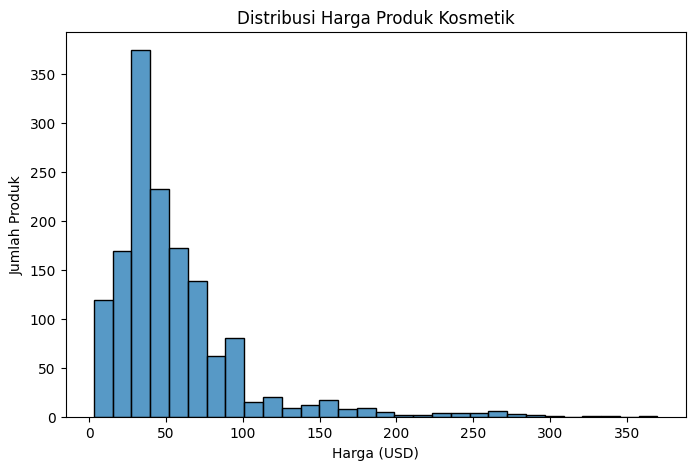

In [81]:
plt.figure(figsize=(8,5))
sns.histplot(df["Price"], bins=30)
plt.title("Distribusi Harga Produk Kosmetik")
plt.xlabel("Harga (USD)")
plt.ylabel("Jumlah Produk")
plt.show()

<h4>Jadi, berdasarkan hasil visualisasi menunjukan bahwa mayoritas produk yang dijual di bawah $70 dan hanya sedikit produk yang harganya mahal.</h4>

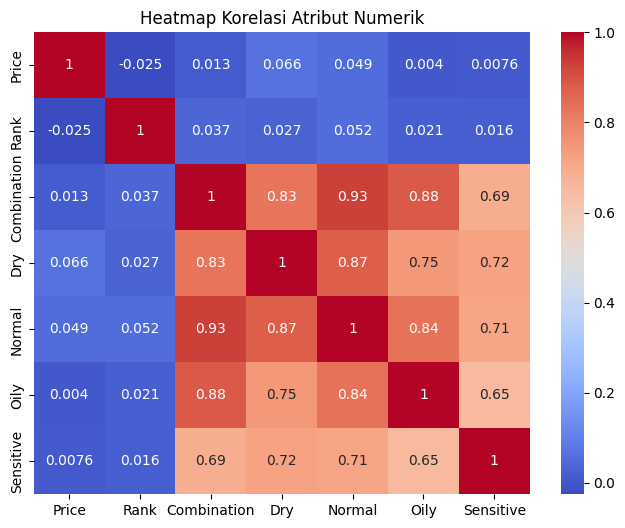

In [82]:
kolom = ["Price", "Rank", "Combination", "Dry", "Normal", "Oily", "Sensitive"]
plt.figure(figsize=(8,6))
sns.heatmap(df[kolom].corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi Atribut Numerik")
plt.show()

<h4>Jadi, berdasarkan hasil visualisasi menunjukkan bahwa korelasi sangat kuat antar jenis kulit, artinya produk yang cocok untuk satu jenis kulit biasanya juga ditandai cocok untuk jenis kulit lain. Adapun juga rank tidak punya korelasi kuat, alhasil rating dari produk tidak dipengaruhi harga maupun jenis kulit</h4>

In [83]:
df.isnull().sum()


,0
Label,0
Brand,0
Name,0
Price,0
Rank,0
Ingredients,0
Combination,0
Dry,0
Normal,0
Oily,0


Untuk mencari tahu jumlah nilai null dalam df dalam cosmetics.csv dan hasilnya tidak ada null




In [84]:
df.duplicated().sum()

np.int64(0)

Untuk mencari tahu jumlah nilai yang duplikat dalam cosmetics.csv dan hasilnya tidak ada duplikat

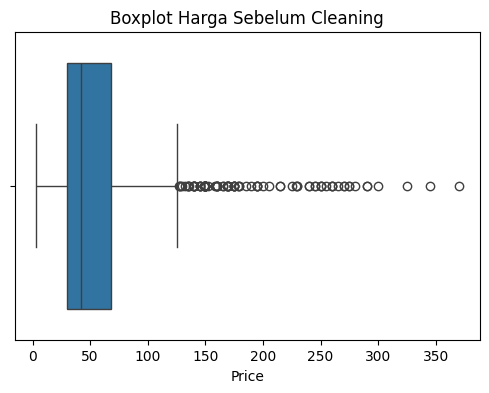

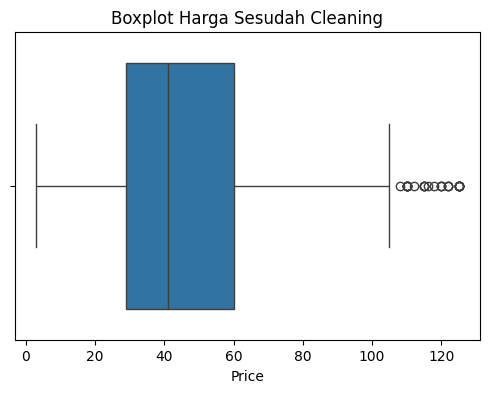

In [85]:

plt.figure(figsize=(6,4))
sns.boxplot(x=df["Price"])
plt.title("Boxplot Harga Sebelum Cleaning")
plt.show()
Q1 = df["Price"].quantile(0.25)
Q3 = df["Price"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_clean = df[(df["Price"] >= lower_bound) & (df["Price"] <= upper_bound)]
plt.figure(figsize=(6,4))
sns.boxplot(x=df_clean["Price"])
plt.title("Boxplot Harga Sesudah Cleaning")
plt.show()

Untuk membersihkan outliner pada kolom Price dengan visualisasi boxplot sebelum dan sesudah.




In [86]:
numerik_cols = ["Rank", "Price", "Combination", "Dry", "Normal", "Oily", "Sensitive"]
scaler = StandardScaler()
df[numerik_cols] = scaler.fit_transform(df[numerik_cols])
df = pd.read_csv("cosmetics.csv")
print(df[numerik_cols].head(5))

   Rank  Price  Combination  Dry  Normal  Oily  Sensitive
0   4.1    175            1    1       1     1          1
1   4.1    179            1    1       1     1          1
2   4.4     68            1    1       1     1          0
3   3.8    175            1    1       1     1          1
4   4.1     38            1    1       1     1          1


Untuk menstandarisasi data numerik agar seimbang dengan scaling

In [87]:
string_cols = ["Label", "Brand"]
encoder = LabelEncoder()
for col in string_cols:
    df[col] = encoder.fit_transform(df[col])
df.head(5)

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,3,64,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,3,95,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,3,29,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,3,64,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,3,49,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


Untuk mengubah data kategorikal menjadi numerik

In [88]:
df["Brand_Popularity"] = df.groupby("Brand")["Brand"].transform("count")
le_brand = LabelEncoder()
df["Brand_encoded"] = le_brand.fit_transform(df["Brand"])
df[["Brand", "Brand_Popularity"]].head(10)


,Brand,Brand_Popularity
0,64,30
1,95,17
2,29,20
3,64,30
4,49,16
5,106,19
6,29,20
7,29,20
8,57,46
9,64,30


Untuk menciptakan kolom/fitur baru yaitu brand popularity

In [89]:
X = df.drop(columns=["Rank"])
y = df["Rank"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Jumlah data training:", X_train.shape[0])
print("Jumlah data testing:", X_test.shape[0])

Jumlah data training: 1177
Jumlah data testing: 295


Untuk split data yang dibagi jadi 2 yaitu train dan test, train set sebesar 80% dan test set sebesar 20%

In [90]:

X = df[["Rank", "Price"]]
y = df["Label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



implementasi Supervised Learning untuk melakukan klasifikasi pada dataset kosmetik. Untuk var x mengambil kolom Rank dan Price, sedangkan var y/target mengambil kolom Label.

In [91]:
svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

Karena memilih klasifikasi, maka digunakan metode SVC dan Random Forest Classifier.

Pada metode SVC, sebelum proses pelatihan model dilakukan, data feature diskalakan menggunakan StandardScaler() agar memiliki rentang nilai yang seragam.

Kemudian, pada metode Random Forest Classifier, proses predikssi dilakukan berdasarkan hasil voting dari seluruh pohon keputusan yang dibentuk dalam model. Setiap pohon memberikan prediksi masing-masing, dan hasil akhir diambil berdasarkan mayoritas suara dari semua pohon.

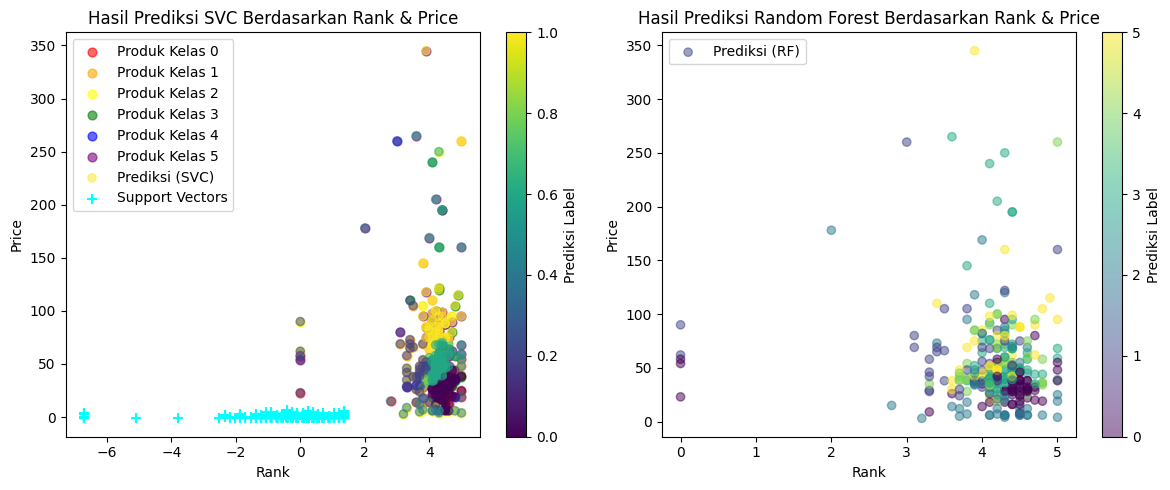

In [92]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
for i in range(6):
    plt.scatter(X_test[y_test == i]["Rank"], X_test[y_test == i]["Price"],
    s=40, label=f'Produk Kelas {i}', alpha=0.6, color=colors[i])
plt.scatter(X_test["Rank"], X_test["Price"], c=y_pred_svc, alpha=0.5, label='Prediksi (SVC)')
support_vectors = svc.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=60, color='cyan', marker='+', label='Support Vectors')
plt.title("Hasil Prediksi SVC Berdasarkan Rank & Price")
plt.xlabel("Rank")
plt.ylabel("Price")
plt.colorbar(label="Prediksi Label")
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(X_test["Rank"], X_test["Price"], c=y_pred_rf, alpha=0.5, label='Prediksi (RF)')
plt.title("Hasil Prediksi Random Forest Berdasarkan Rank & Price")
plt.xlabel("Rank")
plt.ylabel("Price")
plt.colorbar(label="Prediksi Label")
plt.legend()
plt.tight_layout()
plt.show()

Model SVC cenderung membentuk batas pemisah antara dua kelas. Namun, dari sebaran data tampak bahwa beberapa titik dari kelas berbeda masih saling tumpang tindih sehingga dikatakan tidak cukup kuat memisahkan kategori dengan jelas. Hal ini menunjukkan bahwa SVC kurang mampu menangkap pola kompleks pada data, terutama jika hubungan antara variabel tidak linear.

Sedangkan model Random Forest Classifier cukup stabil, meskipun dataset memiliki distribusi yang tidak seimbang antara harga dan peringkat. Dan juga menangkap pola non-linear membuat hasil prediksinya lebih adaptif dan realistis dibandingkan model linear seperti SVC.


In [93]:
print("Evaluasi SVC")
cm_svc = confusion_matrix(y_test, y_pred_svc)
print(cm_svc)
print(classification_report(y_test, y_pred_svc))

print("Evaluasi Random Forest Classifier")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)
print(classification_report(y_test, y_pred_rf))

Evaluasi SVC
[[35  2  5 14  3  6]
 [ 1 23  2 12  0 11]
 [15  4 12 16  1  7]
 [ 8  2  0 31  1 13]
 [ 5  5  0 12  2  0]
 [ 3  5  2 21  0 16]]
              precision    recall  f1-score   support

           0       0.52      0.54      0.53        65
           1       0.56      0.47      0.51        49
           2       0.57      0.22      0.32        55
           3       0.29      0.56      0.39        55
           4       0.29      0.08      0.13        24
           5       0.30      0.34      0.32        47

    accuracy                           0.40       295
   macro avg       0.42      0.37      0.37       295
weighted avg       0.44      0.40      0.39       295

Evaluasi Random Forest Classifier
[[33  4 10  8  6  4]
 [ 4 14  5 11  9  6]
 [ 9  7 20  9  4  6]
 [ 6  8  3 16 11 11]
 [ 5  5  3  7  3  1]
 [ 3  3  7 17  6 11]]
              precision    recall  f1-score   support

           0       0.55      0.51      0.53        65
           1       0.34      0.29      0.31    

Dari hasil evaluasi, dapat dilihat performa masing-masing model dalam mengenali label pada dataset. Nilai F1-score yang rendah menunjukkan bahwa model masih sering salah dalam membedakan kategori produk seperti moisturizer, cleanser, treatment, dan lainnya. Kemungkinan penyebabnya bisa berasal dari data yang tidak seimbang (jumlah produk tiap kelas berbeda jauh), fitur yang terbatas, atau karakteristik data yang saling tumpang tindih antar kelas. Model SVC sedikit lebih baik dalam recall untuk beberapa kelas, sementara Random Forest memiliki performa yang lebih stabil secara keseluruhan.